In [2]:
import os, sys
import pandas as pd
import numpy as np
import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
file_3pt_shooting = './nba_3pt_progressions_all_players.json'
with open(file_3pt_shooting, 'r') as f:
    data_3pt_shooting = json.load(f)
    f.close()

In [52]:
print(data_3pt_shooting[0])

{'name': 'Álex Abrines', 'url': 'https://www.basketball-reference.com/players/a/abrinal01.html', 'row_data': [{'age': '23', 'fg3': '94', 'fg3a': '247', 'fg3_pct': '.381'}, {'age': '24', 'fg3': '84', 'fg3a': '221', 'fg3_pct': '.380'}, {'age': '25', 'fg3': '41', 'fg3a': '127', 'fg3_pct': '.323'}]}


In [53]:
## Need to create a dataframe with the following columns
##  name                              - will be the 'units' value for sns.lineplot
##  season, as a zero'd out age value - will be the x axis
##  fg3
##  fg3a
##  fg3_pct                           - will be the y axis

## To Do:
##  [x] fix the issue with multiple rows when a player was on more than 1 team in a single season

records_3pt_shooting = []
for row in data_3pt_shooting:
    #print (row)
    name = row['name']
    min_age = min([int(x['age']) for x in row['row_data']])
    prev_age = 0
    for season in row['row_data']:
        year = int(season['age']) - min_age
        fg3 = float(season['fg3'].replace('<strong>','').replace('</strong>',''))
        fg3a = float(season['fg3a'].replace('<strong>','').replace('</strong>',''))
        fg3_pct = float(season['fg3_pct'].replace('<strong>','').replace('</strong>',''))
        if fg3a > 25 and prev_age!=season['age']:
            records_3pt_shooting.append({
                'name': name,
                'year': year,
                'fg3': fg3,
                'fg3a': fg3a,
                'fg3_pct': fg3_pct,
            })
        prev_age = season['age']

df_3pt_shooting = pd.DataFrame(records_3pt_shooting)

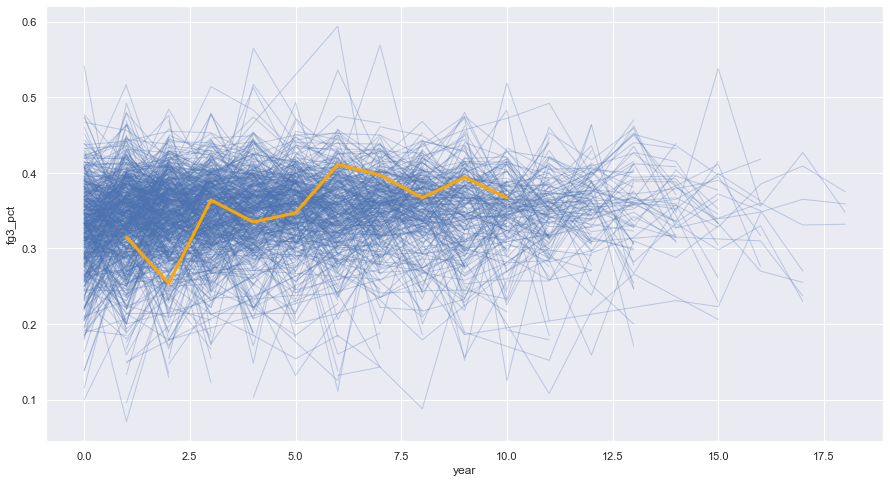

In [74]:
sns.set(rc = {'figure.figsize':(15, 8)})
sns.lineplot(
    data=df_3pt_shooting,
    x="year", y="fg3_pct", units="name",
    estimator=None, lw=1, alpha=0.3
)

player_highlight = 'Tobias Harris' #None
if player_highlight:
    df_3pt_shooting_player = df_3pt_shooting[df_3pt_shooting['name']==player_highlight]
    sns.lineplot(data=df_3pt_shooting_player,
        x="year", y="fg3_pct", units="name",
        estimator=None, lw=3, color='orange'
    )